<a href="https://colab.research.google.com/github/rdguerrerom/curso_computacion_cuantica/blob/main/Computacion_Cuantica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
__authors__    = "Ruben Dario Guerrero, PhD"
__credits__   = ["Ruben Dario Guerrero, PhD"]
__copyright_amp__ = "(c) Ruben Dario Guerrero"
__email__   = "rdguerrerom@unal.edu.co"

#UNIDAD 1 - El átomo 

## Niveles de energía discretos y estructura atómica

###Niveles atómicos

La solucion de la ecuación de Schrödinger describe los niveles de energía de un atomó en el que no se tiene en cuuenta la interacción entre electrones. Tiene la siguiente forma:
$$
E \psi=-\frac{\hbar^{2}}{2 \mu} \nabla^{2} \psi-\frac{Z q^{2}}{4 \pi \varepsilon_{0} r} \psi
$$
Dond $q$ es la carga del electrón, $e r$ es la posicion del electrón relativa al nucleo, $|\vec r|= r$ s la distancia al nuucleo, $Z$ es la carga del nuecleo $\varepsilon_{0}$ es la permitividad del vacio y finalmente
$$
\mu=\frac{m_{q} m_{p}}{m_{q}+m_{p}},
$$
es la masa reducida del electrón, siendo $m_{p}$ la masa del protón y $m_{q}$ la masa del electrón.
Típicamente esta ecuación se resuelve planteado una separación de variables como siguue:
$$
\psi(r, \theta, \varphi)=R(r) Y_{\ell}^{m}(\theta, \varphi)=R(r) \Theta(\theta) \Phi(\varphi)
$$
Donde $R$ es la función radial y $Y_{\ell}^{m}$ son los esféricos armónicos dee grado $\ell$ y orden $m$. El caso $Z=1$ s el único cuya solución analítica exacta se conoce: 
$$
\psi_{n \ell m}(r, \theta, \varphi)=\sqrt{\left(\frac{2}{n a_{0}}\right)^{3} \frac{(n-\ell-1) !}{2 n[(n+t) !]}} e^{-r / n a_{0}}\left(\frac{2 r}{n a_{0}}\right)^{\ell} L_{n-\ell-1}^{2 \ell+1}\left(\frac{2 r}{n a_{0}}\right) \cdot Y_{\ell}^{m}(\theta, \varphi)
$$
Donde se ha definido el rádio de Bohr,
$$
a_{0}=\frac{4 \pi \varepsilon_{0} \hbar^{2}}{m_{q} q^{2}} \approx 0.52 \unicode{x212B}
$$
Los polinómios ganaralizados de Laguerre, $L_{n-\ell-1}^{2 \ell+1}(\cdots)$, y los númueros cuánticos principal, $n$, azimutal, $\ell$, y magnético, $m$. los números cuánticos toman valores que satisfacen las siguientes condiciones:
$$
\begin{array}{l}
n=1,2,3, \ldots \\
\ell=0,1,2, \ldots, n-1 \\
m=-\ell, \ldots, \ell
\end{array}
$$
La strcutura de capas de un átomo se origina por el número cuántico $\ell$ y a cada capa se le asigna una letra según el valor de $\ell$:

$\ell$ | Letra      | # orbitales
--|:---------:|:-----------:
0|S      | 1
1|P   | 3
2|D   | 5
3|F   | 7
4|G   | 9
5|H   | 11
6|I   | 13

Cada orbital puede acomodar bien sea dos electrones (uno con espin $\uparrow$ y otro con espin $\downarrow$), o un espin (con espin $\uparrow$ o $\downarrow$), o ninguno.

### Como lucen los orbitales?

En este dominio, generalmente se definen incluyendo un factor de $ (- 1) ^ m $ (la convención de fase de Condon-Shortley):
$$
Y_{l}^{m}(\theta, \varphi)=(-1)^{m} \sqrt{\frac{(2 l+1)}{4 \pi} \frac{(l-m) !}{(l+m) !}} P_{lm}(\cos \theta) e^{i m \varphi}
$$
donde $ P_{lm}(\cos \theta) $ es un polinomio de Legendre asociado (sin el factor de $ (- 1) ^ m $).

Dado que $Y_{l}^{m}(\theta, \varphi)$ son funciones complejas de ángulo, a menudo se considera más conveniente usar sus formas reales para su representación en figuras y en algunos cálculos. Una base real adecuada de armónicos esféricos puede definirse como:
$$
Y_{l m}=\left\{\begin{array}{ll}
\sqrt{2}(-1)^{m} \operatorname{Im}\left[Y_{l}^{|m|}\right] & \text { if } m<0 \\
Y_{l}^{0} & \text { if } m=0 \\
\sqrt{2}(-1)^{m} \operatorname{Re}\left[Y_{l}^{m}\right] & \text { if } m>0
\end{array}\right.
$$
El siguiente código utiliza la rutina special.sph_harm de SciPy para calcular los armónicos esféricos, que luego se convierten en estas funciones reales y se muestran en un diagrama de Matplotlib tridimensional. 

In [74]:
# dependences for ploting solid harmonics
!dpkg --configure -a
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-extra is already the newest version (2017.20180305-2).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


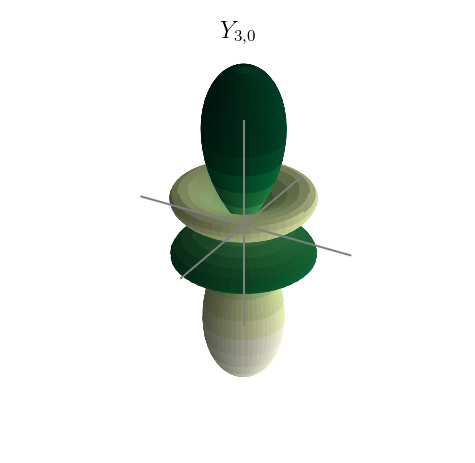

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('YlGn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
l, m = 3, 0
plot_Y(ax, l, m)
plt.savefig('Y{}_{}.png'.format(l, m))
plt.show()

Para graficar una familia de capas:

0 0
1 -1
1 0
1 1
2 -2
2 -1
2 0
2 1
2 2
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3
4 -4
4 -3
4 -2
4 -1
4 0
4 1
4 2
4 3
4 4
5 -5
5 -4
5 -3
5 -2
5 -1
5 0
5 1
5 2
5 3
5 4
5 5


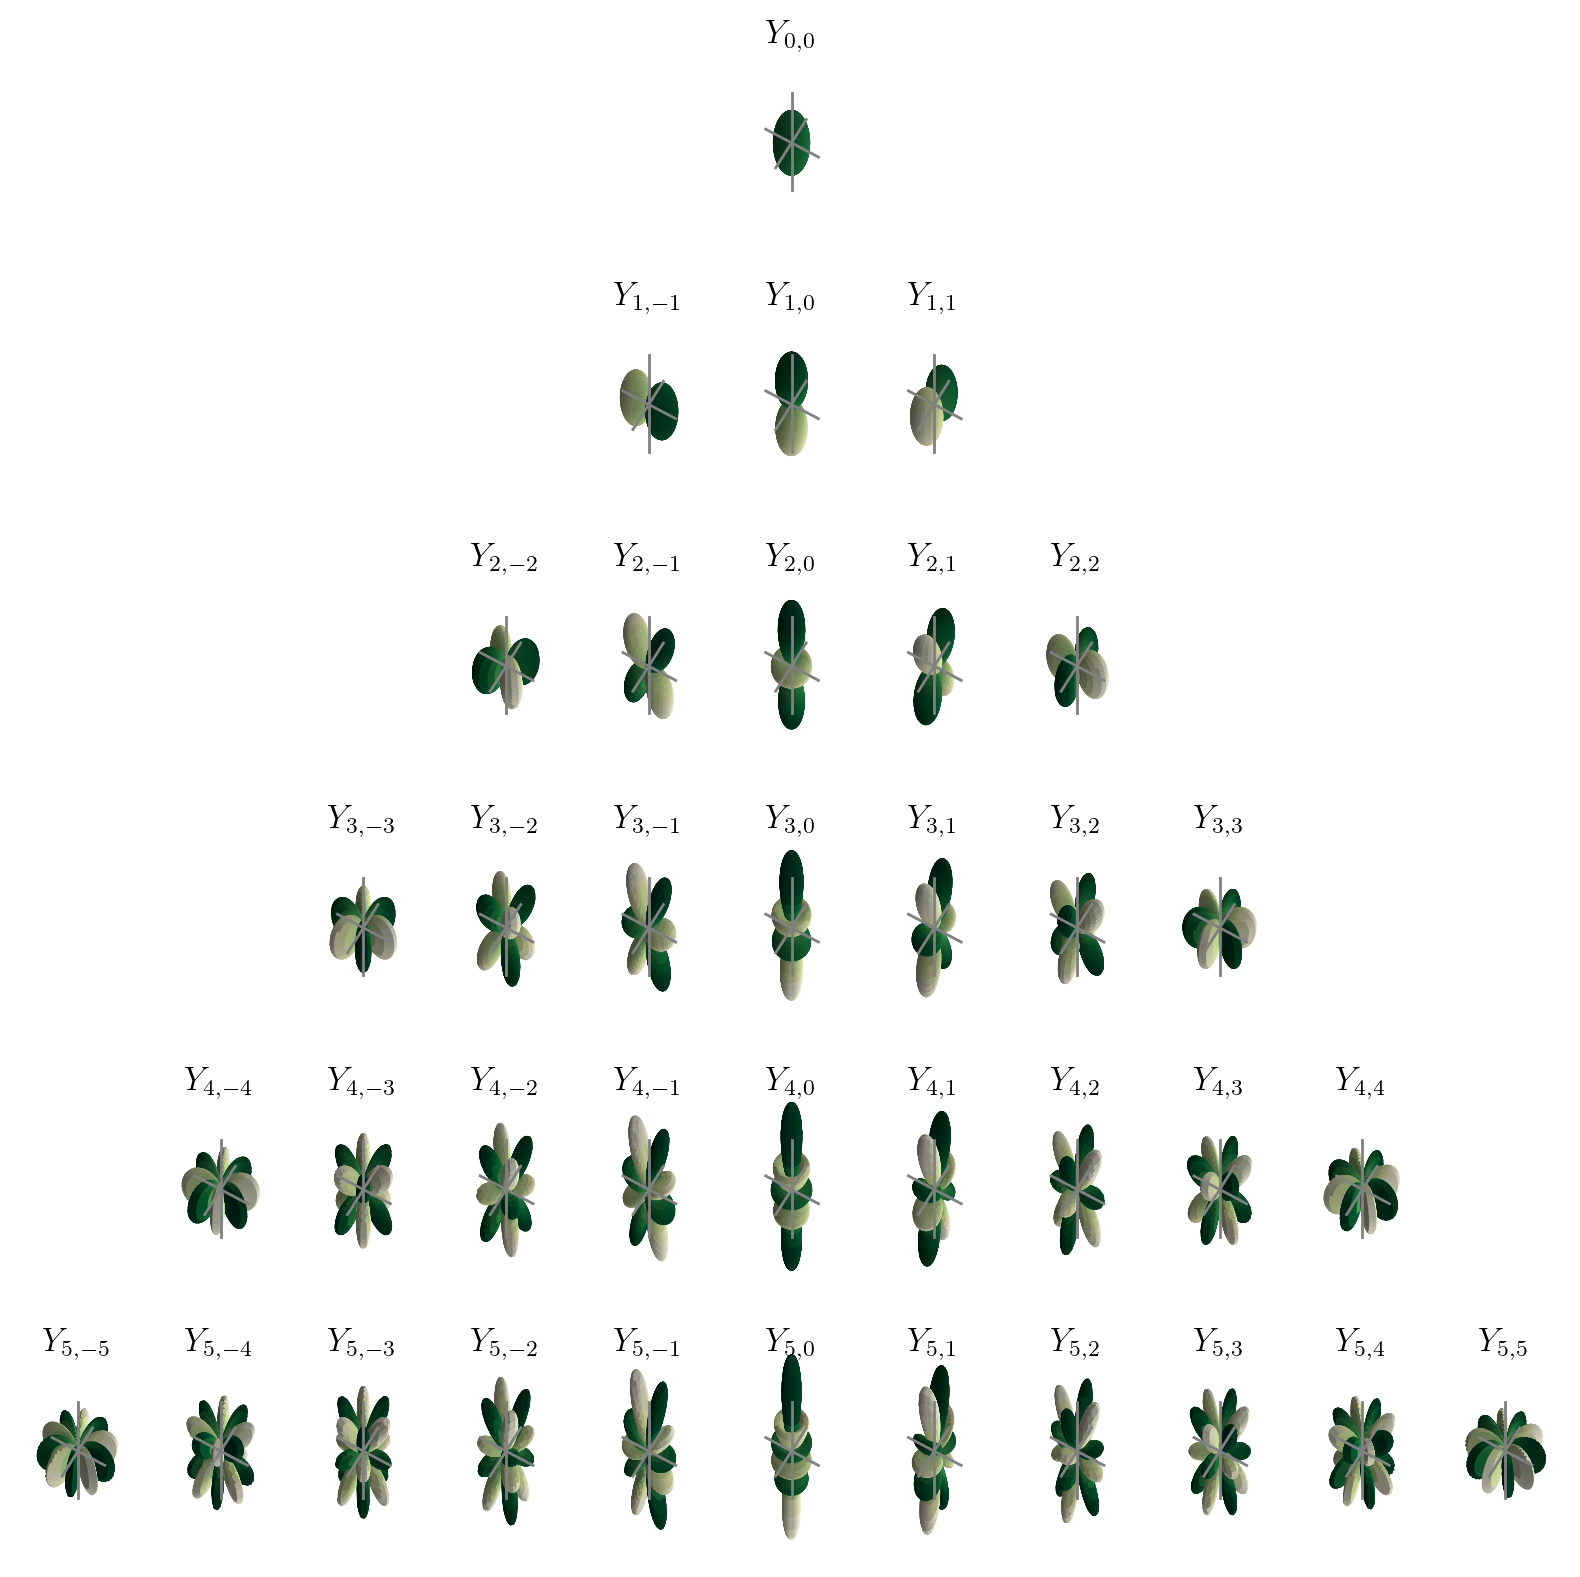

In [76]:
el_max = 5
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
# para salvar la imagen:
#plt.savefig('sph_harm.png')
plt.show()

Las funciones radiales, es decir, soluciones mecánicas cuánticas al atractivo potencial de Coulomb:

In [77]:
!pip install ipyvolume

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy.integrate as integrate

# Increase resolution for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Load interactive widgets
import ipywidgets as widgets

import ipyvolume as ipv

La amplitud de probabilidad radial en la rireccion radial es $r^2 R(r)$

In [79]:
# Import special functions 
import scipy.special as spe

In [80]:
def psi_R(r,n=1,l=0):

    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre

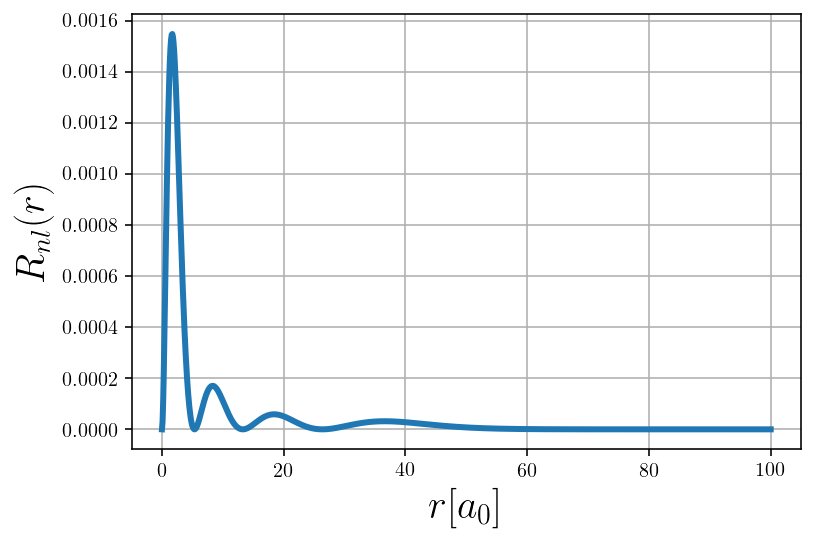

In [81]:
r = np.linspace(0,100,1000)

R = psi_R(r,n=5,l=1)

plt.plot(r, R**2, lw=3)

plt.xlabel('$r [a_0]$',fontsize=20)

plt.ylabel('$R_{nl}(r)$', fontsize=20)

plt.grid('True')

Gráfico interactivo

In [82]:
nmax=10

@widgets.interact(n = np.arange(1,nmax,1), l = np.arange(0,nmax-1,1))

def plot_radial(n=1,l=0):
    
    r =    np.linspace(0,250,10000)
    
    psi2 = psi_R(r,n,l)**2 * (r**2)
    
    plt.plot(r, psi2, lw=2, color='red')
    

    ''' Styling the plot'''
    
    plt.xlabel('$r [a_0]$')

    plt.ylabel('$R_{nl}(r)$')
    
    rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))
    
    plt.xlim([0, 2*rmax])

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

 $Y_{lm}(\phi,\theta)$ usando scipy.

In [83]:
def psi_ang(phi,theta,l=0,m=0):
    
    sphHarm = spe.sph_harm(m,l,phi,theta)
    
    return sphHarm.real
    
phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)

phi, theta = np.meshgrid(phi, theta)

Ylm = psi_ang(theta,phi,l=2,m=0)

Convertir coordenadas esféricas en coordenadas cartesianas para poder graficar:



In [84]:
x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


(-1.0, 1.0)

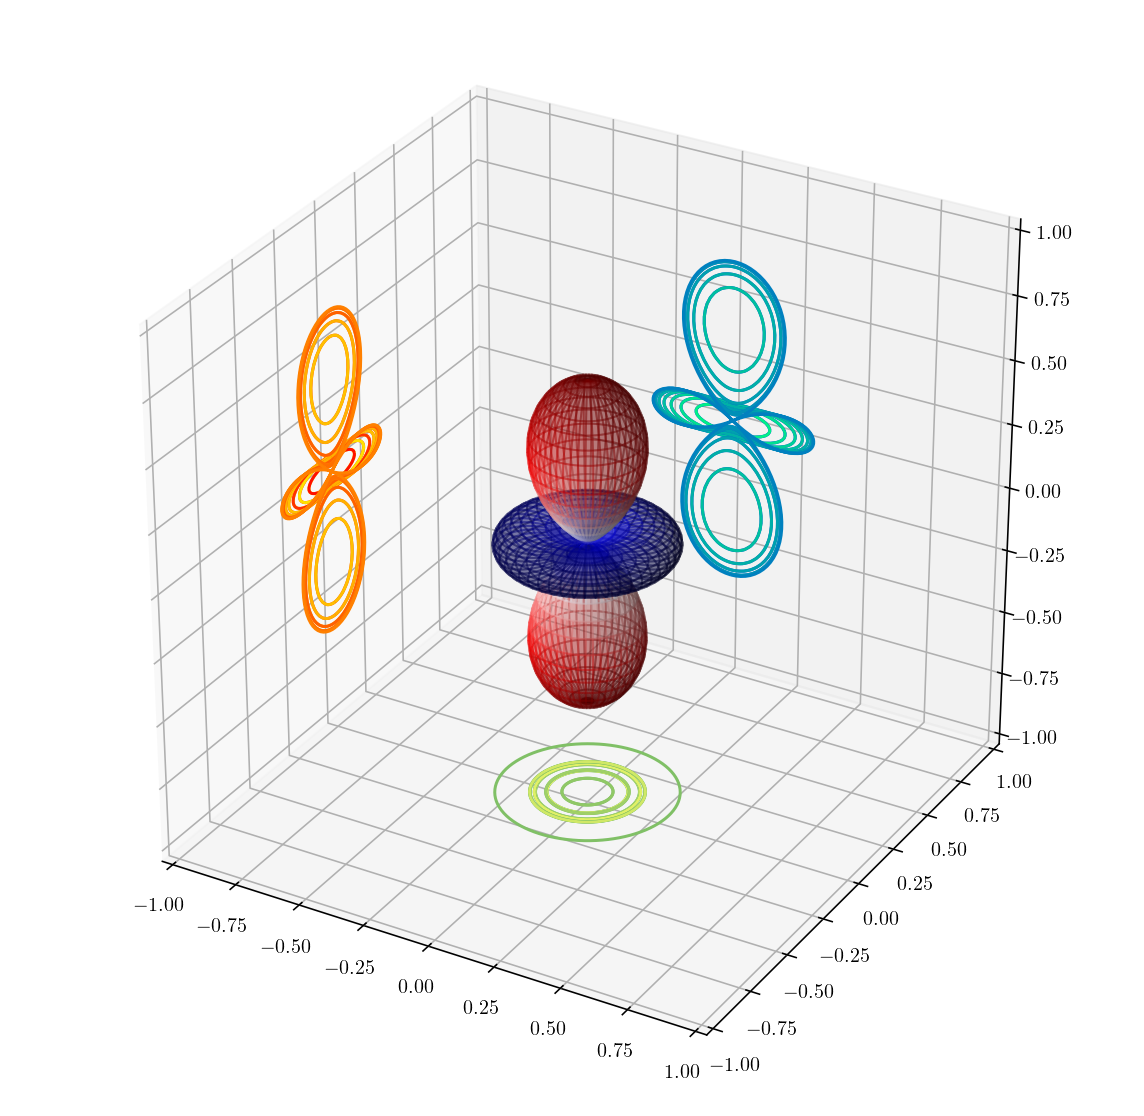

In [85]:
'''Set up the 3D Canvas'''

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

''' Normalize color bar to [0,1] scale'''

fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

'''Make 3D plot of real part of spherical harmonic'''

ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)


''' Project 3D plot onto 2D planes'''

cset = ax.contour(x, y, z,20, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x, y, z,20, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x, y, z,20, zdir='x',offset = -1, cmap='autumn')


''' Set axes limit to keep aspect ratio 1:1:1 '''

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

Graficando los orbitales completos:

In [86]:
def HFunc(r,theta,phi,n,l,m):
    '''
    Hydrogen wavefunction // a_0 = 1

    INPUT
        r: Radial coordinate
        theta: Polar coordinate
        phi: Azimuthal coordinate
        n: Principle quantum number
        l: Angular momentum quantum number
        m: Magnetic quantum number

    OUTPUT
        Value of wavefunction
    '''


    return psi_R(r,n,l) * psi_ang(phi,theta,l,m)

In [87]:
nmax = 10
lmax = nmax-1

@widgets.interact(n=np.arange(1,nmax,1), l = np.arange(0,nmax-1,1), m=np.arange(-lmax,lmax+1,1))

def psi_xz_plot(n=1,l=0,m=0):

    plt.figure(figsize=(10,8))
    
    
    limit = 4*(n+l) 
    
    x_1d = np.linspace(-limit,limit,500)
    z_1d = np.linspace(-limit,limit,500)
    
    x,z = np.meshgrid(x_1d,z_1d)
    y   = 0
    
    r     = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(np.sqrt(x**2+y**2), z )
    phi   = np.arctan2(y, x)

    
    psi_nlm = HFunc(r,theta,phi,n,l,m)
    
    #plt.pcolormesh(x, z, psi_nlm, cmap='inferno')  # Try cmap = inferno, rainbow, autumn, summer, 
    
    plt.contourf(x, z,  psi_nlm, 20, cmap='seismic', alpha=0.6)  # Classic orbitals
    
    plt.colorbar()
    
    plt.title(f"$n,l,m={n,l,m}$",fontsize=20)
    plt.xlabel('X',fontsize=20)
    plt.ylabel('Z',fontsize=20)

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [88]:
import ipyvolume as ipv

#Variables to adjust
maxi = 60
resolution = 160

base = np.linspace(-maxi, maxi, resolution)[:,np.newaxis,np.newaxis]
x2 = np.tile(base, (1,resolution,resolution))
y2 = np.swapaxes(x2,0,1)
z2 = np.swapaxes(x2,0,2)

total = np.concatenate((x2[np.newaxis,:],y2[np.newaxis,:],z2[np.newaxis,:]), axis=0)

r2 = np.linalg.norm(total, axis=0)
#Alternative theta calculation
#theta3 = np.abs(np.arctan2(np.linalg.norm(total[:2], axis=0),-total[2]))
np.seterr(all='ignore')
phi2 = np.arctan(np.divide(total[2],np.linalg.norm(total[:2], axis=0))) + np.pi/2
theta2 = np.arctan2(total[1],total[0])

#UNIDAD 2 - Estados Cuánticos y Cúbits 

## Configuración Inicial de una cuenta en ***IBM Quantum Experience***

In [89]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-9bxk45ex
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-9bxk45ex


##Representación de los estados de Cúbit

A continuación se muestra un código de Python que necesitaremos ejecutar si queremos usar el código en esta sección:

In [90]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

### Dividiendo la información en bits

Lo primero que debemos conocer es la idea de bits. Estos están diseñados para ser el alfabeto más simple del mundo. Con solo dos caracteres, 0 y 1, podemos representar cualquier dato.

Un ejemplo son los números. Probablemente esté acostumbrado a representar un número a través de una cadena de diez dígitos 0, 1, 2, 3, 4, 5, 6, 7, 8 y 9. En esta cadena de dígitos, cada dígito representa cuántas veces el número contiene una cierta potencia de diez. Por ejemplo, cuando escribimos 9213, queremos decir



$$ 9000 + 200 + 10 + 3 $$



o, expresado de una manera que enfatiza los potencias de diez



$$ (9\times10^3) ​​+ (2\times10^2) + (1\times10^1) + (3\times10^0) $$



Aunque generalmente usamos este sistema basado en el número 10, podemos usar uno basado en cualquier otro número. El sistema numérico binario, por ejemplo, se basa en el número dos. Esto significa usar los dos caracteres 0 y 1 para expresar números como múltiplos de potencias de dos. Por ejemplo, 9213 se convierte en 10001111111101, ya que



$$ 9213 = (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11})+ (0 \times 2^{10}) +(1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) \\\\ \,\,\, + (1 \times 2^6) + (1 \times 2^ 5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) + (0 \times 2^1) + (1 \times 2^0) $$



En esto estamos expresando números como múltiplos de 2, 4, 8, 16, 32, etc. en lugar de 10, 100, 1000, etc.
<a id="binary_widget"></a>

In [91]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

Estas cadenas de bits, conocidas como cadenas binarias, se pueden usar para representar más que solo números. Por ejemplo, hay una forma de representar cualquier texto usando bits. Para cualquier letra, número o signo de puntuación que desee utilizar, puede encontrar una cadena correspondiente de ocho bits como máximo utilizando [esta tabla](https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/com .ibm.aix.networkcomm/conversion_table.htm). Aunque estos son bastante arbitrarios, este es un estándar ampliamente aceptado. De hecho, es lo que se utiliza para transmitir información  a través de Internet.

Así es como se representa toda la información en las computadoras. Ya sean números, letras, imágenes o sonido, todo existe en forma de cadenas binarias.

Al igual que nuestras computadoras digitales estándar, las computadoras cuánticas se basan en esta misma idea básica. La principal diferencia es que utilizan *qubits*, una extensión del bit a la mecánica cuántica. En el resto de este documento, exploraremos qué son los cúbits, qué pueden hacer y cómo lo hacen. En esta sección, sin embargo, no estamos hablando de cuántica en absoluto. Entonces, solo usamos qubits como si fueran bits.

###Computación representada como un diagrama <a id="diagram"></a>

Ya sea que usemos qubits o bits, debemos manipularlos para convertir las entradas que tenemos en las salidas que necesitamos. Para los programas más simples con muy pocos bits, es útil representar este proceso en un diagrama conocido como *diagrama de circuito*. Estos tienen entradas a la izquierda, salidas a la derecha y operaciones representadas por símbolos arcanos en el medio. Estas operaciones se denominan 'puertas', principalmente por razones históricas.


Para las computadoras cuánticas, usamos la misma idea básica pero tenemos diferentes convenciones sobre cómo representar entradas, salidas y los símbolos utilizados para las operaciones. 

En el resto de esta sección, explicaremos cómo construir circuitos. 

### Su primer circuito cuántico

En un circuito, normalmente necesitamos hacer tres tareas: primero, codificar la entrada, luego hacer algunos cálculos reales y finalmente extraer una salida. Para su primer circuito cuántico, nos centraremos en el último de estos trabajos. Comenzamos creando un circuito con ocho qubits y ocho salidas.

In [92]:
qc_output = QuantumCircuit(8)

Este circuito, al que hemos llamado `qc_output`, lo crea Qiskit usando `QuantumCircuit`. La instrucción`QuantumCircuit` toma como argumento el número de qubits en el circuito cuántico.

La extracción de salidas en un circuito cuántico se realiza mediante una operación llamada `measure_all()`. Cada medida le dice a un qubit específico que dé una salida a un bit de salida específico. El comando `qc_output.measure_all()` agrega una medida a cada qubit en el circuito `qc_output`, y también agrega algunos bits clásicos para escribir la salida.

In [93]:
qc_output.measure_all()

Ahora que nuestro circuito tiene algo, echemos un vistazo.

In [94]:
qc_output.draw(initial_state=True) 

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

Los qubits siempre se inicializan para dar la salida ```0```. Dado que no hacemos nada con nuestros qubits en el circuito anterior, este es exactamente el resultado que obtendremos cuando los midamos. Podemos ver esto ejecutando el circuito muchas veces y trazando los resultados en un histograma. Encontraremos que el resultado es siempre ```00000000```: un ```0``` de cada qubit.

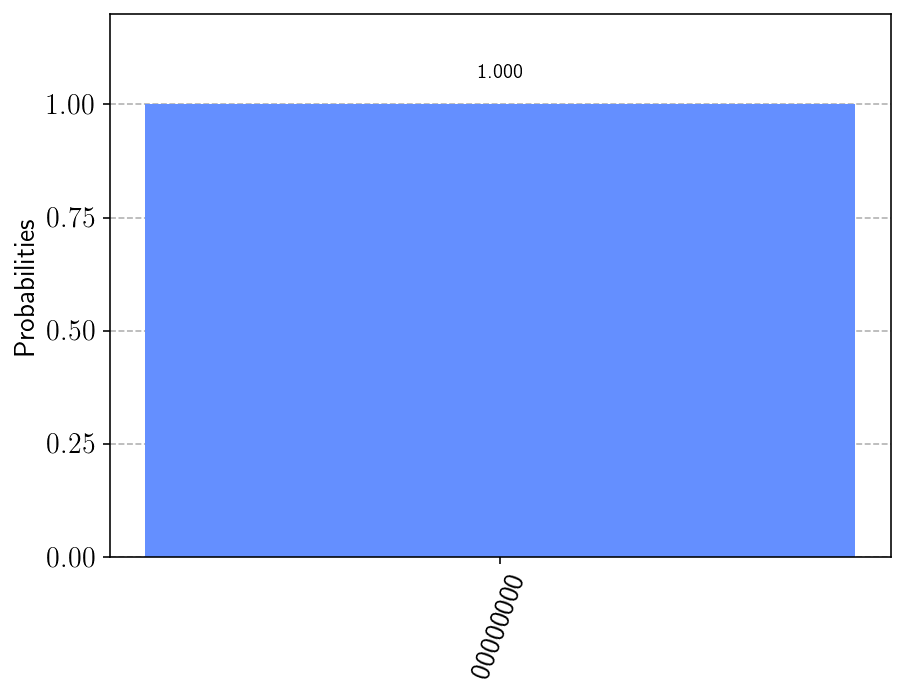

In [95]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

La razón para ejecutar muchas veces y mostrar el resultado como un histograma es que las computadoras cuánticas pueden tener cierta aleatoriedad en sus resultados. En este caso, dado que no estamos haciendo nada cuántico, solo obtenemos el resultado ```00000000``` con certeza.

**Tenga en cuenta que este resultado proviene de un simulador cuántico, que es una computadora estándar que calcula lo que haría una computadora cuántica ideal**. Las simulaciones solo son posibles para una pequeña cantidad de qubits (~30 qubits), pero, sin embargo, son una herramienta muy útil al diseñar sus primeros circuitos cuánticos. Para ejecutar en un dispositivo real, simplemente necesita reemplazar ```Aer.get_backend('aer_simulator')``` con el objeto de backend del dispositivo que desea usar.

###Ejemplo: creación de un circuito sumador <a id="adder"></a>

####Codificando una entrada <a id="encoding"></a>

Ahora veamos cómo codificar una cadena binaria diferente como entrada. Para ello necesitamos lo que se conoce como puerta NOT. Esta es la operación más básica que puede hacer en una computadora. Simplemente cambia el valor del bit: ```0``` se convierte en ```1``` y ```1``` se convierte en ```0```. Para qubits, es una operación llamada ```x``` que hace el trabajo de NOT.

A continuación, creamos un nuevo circuito dedicado al trabajo de codificación y lo llamamos `qc_encode`. Por ahora, solo especificamos el número de qubits.

In [96]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

La extracción de resultados se puede hacer usando el circuito que teniamos antes: `qc_output`.

In [97]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

Ahora podemos ejecutar el circuito combinado y ver los resultados.

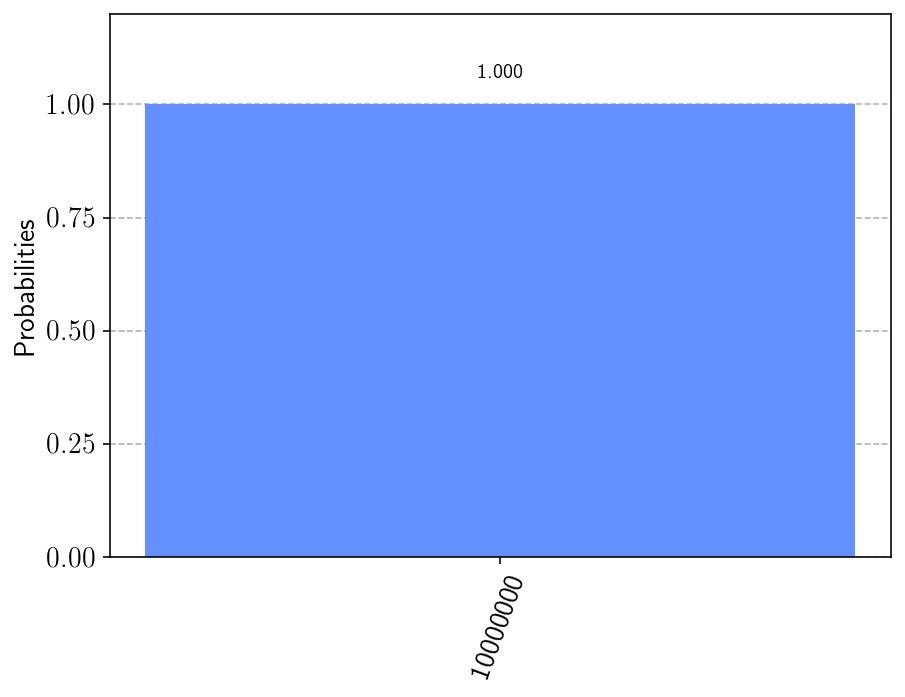

In [98]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Ahora nuestra computadora genera la cadena ```10000000``` en su lugar.

El bit que invertimos, que proviene del qubit 7, está en el extremo izquierdo de la cadena. Esto se debe a que Qiskit numera los bits de una cadena de derecha a izquierda. Algunos prefieren numerar sus bits al revés, pero el sistema de Qiskit ciertamente tiene sus ventajas cuando usamos los bits para representar números. **Específicamente, significa que qubit 7 nos dice cuántos $2^7$ tenemos en nuestro número**. Entonces, al voltear este bit, ahora hemos escrito el número 128 en nuestra computadora simple de 8 bits.

Ahora como ejercisio podría intentear escribir otro número para usted. Podrías escribir tu edad, por ejemplo. Simplemente use un motor de búsqueda para averiguar cómo se ve el número en binario (si incluye un '0b', simplemente ignórelo) y luego agregue algunos 0 al lado izquierdo si tiene menos de 128 años.

In [99]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────

Ahora sabemos cómo codificar información en una computadora. El siguiente paso es procesarlo: tomar una entrada que hemos codificado y convertirla en una salida que necesitamos.

####Recordar cómo agregar <a id="remembering-add"></a>

Para ver cómo convertir las entradas en salidas, necesitamos resolver un problema. Hagamos algunas matemáticas básicas. En la escuela primaria, habrás aprendido cómo tomar grandes problemas matemáticos y dividirlos en partes manejables. Por ejemplo, ¿cómo haría para resolver lo siguiente?

```
   9213
+ 1854
= ????
```

Una forma es hacerlo dígito por dígito, de derecha a izquierda. Así que empezamos con 3+4
```
   9213
+ 1854
= ???7
```

Y luego 1+5
```
   9213
+ 1854
= ??67
```

Entonces tenemos 2+8=10. Dado que esta es una respuesta de dos dígitos, debemos llevarla a la siguiente columna (**incluir la lleva**).

```
   9213
+ 1854
= ?067
   ¹
```

Finalmente tenemos 9+1+1=11, y obtenemos nuestra respuesta

```
   9213
+ 1854
= 11067
   ¹
```

Esto puede ser solo una simple suma, pero demuestra los principios detrás de todos los algoritmos. Ya sea que el algoritmo esté diseñado para resolver problemas matemáticos o procesar texto o imágenes, siempre dividimos las tareas grandes en pasos pequeños y simples.

Para ejecutarse en una computadora, **los algoritmos deben compilarse en los pasos más pequeños y simples posibles**. Para ver cómo se ven, hagamos el problema de suma anterior nuevamente pero en binario.


```
   10001111111101
+ 00011100111110
                                    
= ??????????????
```

Tenga en cuenta que el segundo número tiene un montón de 0 adicionales a la izquierda. Esto solo sirve para que las dos cuerdas tengan la misma longitud.

Nuestra primera tarea es hacer el 1+0 para la columna de la derecha. En binario, como en cualquier sistema numérico, la respuesta es 1. Obtenemos el mismo resultado para el 0+1 de la segunda columna.

```
   10001111111101
+ 00011100111110

= ????????????11
```

A continuación, tenemos 1+1. Como seguramente sabrá, 1+1=2. En binario, el número 2 se escribe ```10```, por lo que requiere dos bits. Esto significa que necesitamos llevar el 1, tal como lo haríamos con el número 10 en decimal.

```
   10001111111101
+ 00011100111110
= ????????????011
             ¹
```

La siguiente columna ahora requiere que calculemos ```1+1+1```. Esto significa sumar tres números, por lo que las cosas se están complicando para nuestra computadora. Pero aún podemos compilarlo en operaciones más simples, y hacerlo de una manera que solo requiera que agreguemos dos bits juntos. Para esto, podemos comenzar con solo los dos primeros 1.

```
   1
+ 1
= 10
```

Ahora necesitamos agregar este ```10``` al final ```1``` , lo que se puede hacer usando nuestro método habitual de recorrer las columnas.

```
  10
+ 01
= 11
```

La respuesta final es ```11``` (también conocido como 3).

Ahora podemos volver al resto del problema. Con la respuesta ```11```, tenemos otro bit de **lleva**.

```
   10001111111101
+ 00011100111110
= ??????????1011
            ¹¹
```

Así que ahora tenemos otro 1+1+1 que hacer. Pero ya sabemos cómo hacerlo, así que no es gran cosa.

De hecho, todo lo que queda hasta ahora es algo que ya sabemos hacer. Esto se debe a que, si descompone todo en agregar solo dos bits, solo hay cuatro cosas posibles que necesitará calcular. Aquí están las cuatro sumas básicas (**o algebra**)(escribiremos todas las respuestas con dos bits para ser consistentes).

```
0+0 = 00 (en decimal, esto es 0+0=0)
0+1 = 01 (en decimal, esto es 0+1=1)
1+0 = 01 (en decimal, esto es 1+0=1)
1+1 = 10 (en decimal, esto es 1+1=2)
```

Esto se llama un *medio sumador*. Si nuestra computadora puede implementar esto, y si puede encadenar muchos de ellos, puede agregar cualquier cosa.

####Sumando con Qiskit <a id="adding-qiskit"></a>

Hagamos nuestro propio medio sumador usando Qiskit. Esto incluirá una parte del circuito que codifica la entrada, una parte que ejecuta el algoritmo y una parte que extrae el resultado. La primera parte habrá que cambiarla cada vez que queramos utilizar una nueva entrada, pero el resto permanecerá siempre igual.

Los dos bits que queremos agregar están codificados en los qubits 0 y 1. El ejemplo anterior codifica un ```1``` en ambos qubits, por lo que busca encontrar la solución de ```1+1``. `. El resultado será una cadena de dos bits, que leeremos de los qubits 2 y 3 y almacenaremos en los bits clásicos 0 y 1, respectivamente. Todo lo que queda es completar el programa real, que vive en el espacio en blanco en el medio.

Las líneas discontinuas en el diagrama resultante son solo para distinguir las diferentes partes del circuito (aunque también pueden tener usos más interesantes). Se hacen usando el comando `barrier`.

**Las operaciones básicas de la computación se conocen como puertas lógicas**. Ya hemos usado la puerta NOT, pero esto no es suficiente para hacer nuestro medio sumador. Solo podíamos usarlo para escribir manualmente las respuestas. Dado que queremos que la computadora haga la computación real por nosotros, necesitaremos algunas puertas más poderosas.

Para ver lo que necesitamos, echemos otro vistazo a lo que necesita hacer nuestro medio sumador.

```
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
```

El bit más a la derecha en las cuatro respuestas está **completamente determinado** por si los dos bits que estamos agregando son iguales o diferentes. Entonces, para ```0+0``` y ```1+1```, donde los dos bits son iguales, el bit más a la derecha de la respuesta es ```0```. Para ```0+1``` y ```1+0```, donde agregamos diferentes valores de bits, el bit más a la derecha es ```1```.

Para que esta parte de nuestra solución sea correcta, necesitamos algo que pueda determinar si dos bits son diferentes o no. Tradicionalmente, en el estudio de la computación digital, esto se denomina puerta **XOR**.

| Entrada 1 | Entrada 2 | Salida XOR |
|:-------:|:-------:|:------:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

En las computadoras cuánticas, el trabajo de la puerta **XOR** lo realiza la puerta **NOT** controlada. Dado que es un nombre bastante largo, generalmente lo llamamos CNOT. En Qiskit su nombre es ```cx```, que es aún más corto. En los diagramas de circuito, se dibuja como en la imagen de abajo.

In [100]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

Esto se aplica a un par de qubits. Uno actúa como el qubit de control (este es el que tiene el pequeño punto). El otro actúa como *objetivo qubit* (con el gran círculo que tiene un ```+``` dentro).

Hay múltiples formas de explicar el efecto de la CNOT. Una es decir que mira sus dos bits de entrada para ver si son iguales o diferentes. A continuación, sobrescribe el qubit de destino con la respuesta. El objetivo se convierte en ```0``` si son iguales, y ```1``` si son diferentes.



**Otra forma de explicar el CNOT es decir que hace un NOT en el objetivo si el control es ```1```, y no hace nada en caso contrario.** Esta explicación es tan válida como la anterior (de hecho, es la que da nombre a la puerta).

Como ejercico, pruebe el **CNOT** usted mismo probando cada una de las entradas posibles. Por ejemplo, aquí hay un circuito que prueba el CNOT con la entrada ```01```.

In [101]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

Si ejecuta este circuito, encontrará que la salida es ```11```. Podemos pensar que esto suceda por cualquiera de las siguientes razones.

- El **CNOT** calcula si los valores de entrada son diferentes y encuentra que lo son, lo que significa que quiere generar ```1```. Lo hace escribiendo sobre el estado del qubit 1 (que, recuerde, está a la izquierda de la cadena de bits), convirtiendo ```01``` en ```11```.

- El **CNOT** ve que el qubit 0 está en el estado ```1```, por lo que aplica un NOT al qubit 1. Esto convierte el ```0``` del qubit 1 en un ```1```, y así convierte ```01``` en ```11```.

Aquí hay una tabla que muestra todas las entradas posibles y las salidas correspondientes de la puerta CNOT:

| Entrada (q1 q0) | Salida (q1 q0) |
|:-------------:|:--------------:|
| 00 | 00 |
| 01 | 11 |
| 10 | 10 |
| 11 | 01 |

Para nuestro medio sumador, no queremos sobrescribir una de nuestras entradas. En cambio, queremos escribir el resultado en un par diferente de qubits. Para ello, podemos utilizar dos **CNOT**.

In [102]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

Ahora estamos a mitad de camino hacia un medio sumador completamente funcional. Solo nos queda la otra parte de la salida por hacer: la que estará en el qubit 3.

Si miras de nuevo las cuatro sumas posibles, notarás que solo hay un caso para el cual es ```1``` en lugar de ```0```: ```1+1``` =```10```. Ocurre solo cuando los dos bits que estamos agregando son ```1```.

Para calcular esta parte de la salida, podríamos simplemente hacer que nuestra computadora mirara si ambas entradas son ```1```. Si son — y solo si lo son — necesitamos hacer una puerta NOT en el qubit 3. Eso lo cambiará al valor requerido de ```1``` solo para este caso, dándonos la salida que necesitamos.

Para esto, necesitamos una nueva puerta: como un **CNOT** pero controlado en dos qubits en lugar de solo uno. Esto realizará un **NOT** en el qubit de destino solo cuando ambos controles estén en el estado ```1```. Esta nueva puerta se llama **Toffoli**. Para aquellos de ustedes que están familiarizados con las puertas lógicas booleanas, es básicamente una puerta **AND**.

En Qiskit, el Toffoli se representa con el comando `ccx`.

In [103]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

En este ejemplo estamos calculando ```1+1```, debido a que los dos bits de entrada son ambos ```1```.  Veamos lo que resulta.

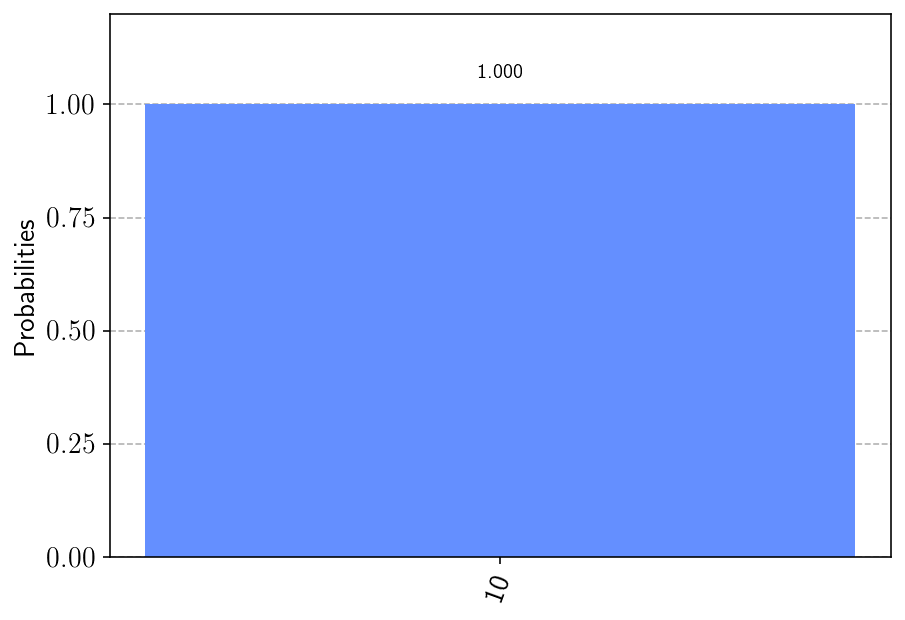

In [104]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

El resultado es ```10```, que es la representación binaria del número 2. ¡Hemos construido una computadora que puede resolver el famoso problema matemático de 1+1!:)

Ahora puede probarlo con las otras tres entradas posibles y demostrar que nuestro algoritmo también da los resultados correctos para ellas.

El medio sumador contiene todo lo que necesitas para sumar. Con las puertas **NOT**, **CNOT** y **Toffoli**, podemos crear programas que suman cualquier conjunto de números de cualquier tamaño.

Estas tres puertas también son suficientes para hacer todo lo demás en la informática (Conjuntp univesal de puertas). De hecho, incluso podemos prescindir de la **CNOT**. Además, la puerta **NOT** solo es realmente necesaria para crear bits con valor ```1```. La puerta de **Toffoli** es esencialmente **el átomo de las matemáticas**. Es el elemento más simple, a partir del cual se pueden compilar todas las demás técnicas de resolución de problemas.

##Puertas de Cúbit individuales

En la sección anterior, analizamos todos los estados posibles en los que podría estar un qubit. Vimos que los qubits pueden representarse mediante vectores 2D y que sus estados están limitados a la forma:

$$ |q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Donde $0 \le \theta \le \pi $ y $0 \le \phi \le 2 \pi$ son números reales. En esta sección cubriremos _compuertas_, las operaciones que cambian un qubit entre estos estados. **Debido a la cantidad de puertas y las similitudes entre ellas, este capítulo corre el riesgo de convertirse en una lista**.

Anteriormente encontramos algunas puertas y las usamos para realizar un cálculo clásico. Una característica importante de los circuitos cuánticos es que, entre inicializar los qubits y medirlos, las operaciones (compuertas) son *_siempre_* ¡reversibles! Estas puertas reversibles se pueden representar como matrices y como rotaciones alrededor de la esfera de Bloch.

###Puertas de Pauli

Debe estar familiarizado con las **matrices de Pauli**. Veremos aquí que las matrices de Pauli pueden representar algunas puertas cuánticas de uso muy común.

####Puerta X

La puerta X está representada por la matriz Pauli-X:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle 1| + |1\rangle\langle 0| $$

Para ver el efecto que tiene una puerta en un qubit, simplemente multiplicamos el vector de estado del qubit por la puerta. Podemos ver que la puerta X cambia las amplitudes de los estados $|0\rangle$ y $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

En Qiskit, podemos crear un cortocircuito para verificar esto:

In [105]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()  

┌───┐
q: ┤ X ├
   └───┘

Veamos el resultado del circuito anterior. **Nota:** Aquí usamos `plot_bloch_multivector()` que toma el vector de estado de un qubit en lugar del vector de Bloch.

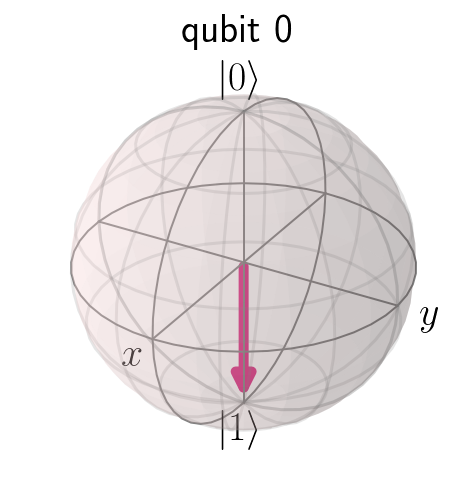

In [106]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

De hecho, podemos ver que el estado del qubit es $|1\rangle$ como se esperaba. **Podemos pensar en esto como una rotación de $\pi$ radianes alrededor del *eje x* de la esfera de Bloch**. La puerta X también se denomina a menudo puerta NOT, en referencia a su análogo clásico.

####Puertas Y y Z  <a id="ynzgatez"></a>

De manera similar a la puerta X, las matrices Y y Z de Pauli también actúan como puertas Y y Z en nuestros circuitos cuánticos:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

**Y, como era de esperar, también realizan respectivamente rotaciones de $\pi$ alrededor de los ejes y y z de la esfera de Bloch**.

A continuación se muestra un widget que muestra el estado de un qubit en la esfera de Bloch, al presionar uno de los botones se realizará la puerta en el qubit:

In [107]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

En Qiskit, podemos aplicar las puertas Y y Z a nuestro circuito usando:

In [108]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐ ░ ┌───┐┌───┐
q: ┤ X ├─░─┤ Y ├┤ Z ├
   └───┘ ░ └───┘└───┘

####Puertas de Hadamard

La puerta de Hadamard (puerta **H**) es una puerta cuántica fundamental. **Nos permite alejarnos de los polos de la esfera de Bloch y crear una superposición de $|0\rangle$ y $|1\rangle$**. Tiene la matriz:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

Podemos ver que esto realiza las siguientes transformaciones:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

Esto se puede considerar como una rotación alrededor del vector de Bloch `[1,0,1]` (la línea entre los ejes x y z), o como una transformación del estado del qubit entre las bases X y Z.

Puedes jugar con estas puertas usando el siguiente widget:

In [109]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

En Qiskit, especificamos una puerta P usando `p(phi, qubit)`:

####Puerta P

La puerta **P** (**puerta de fase**) está _parametrizada_, es decir, necesita un número ($\phi$) para decirle exactamente qué hacer. La puerta **P** realiza una rotación de $\phi$ alrededor de la dirección del eje Z. Tiene la forma matricial:

$$
P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

Donde $\phi$ es un número real.

Puede usar el widget a continuación para jugar con la puerta P, especifique $\phi$ usando el control deslizante:

In [110]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

En Qiskit, especificamos una puerta P usando `p(phi, qubit)`:

In [111]:
from math import pi
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()

┌────────┐
q: ┤ P(π/4) ├
   └────────┘

####Puerta I

Aquí se introduce la puerta I  (aka ‘Id-gate’ or ‘Identity gate’). Esta puerta simplemente no hace nada. Su representacion matricial es la matriz identidad:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

Apicar esta compuerta en cualquier lugar en su circuito no debe tener efecto sobre el estado del qubit, así que resulta curioso pensar porque se necesita definir esta puerta. Existe dos motivos detras  de esta necesidad, uno es que se requiere para expresar los resultados de algunos calculos, por ejemplo: provar qie la puerta X es su propia inversa: 

$$ I = XX $$

En segundo lugar, resulta muy útil cuando se esta considerando la implemenatación practica del circuito el especificar la operación ‘hacer-nada’.

####Puerta S

La siguiente puerta a mencionar es la puerta S (a veces conocida como puerta $\sqrt{Z}$), esta es una puerta P con $\phi = \pi/2$. Da un cuarto de vuelta alrededor de la esfera de Bloch. Es importante tener en cuenta que, a diferencia de todas las puertas presentadas en este capítulo hasta ahora, ¡la puerta S **no** es su propio inversa! Como resultado, a menudo verá la puerta S<sup>†</sup>, (también “S-dagger”, “Sdg” o $\sqrt{Z}^\dagger$-gate). La puerta S<sup>†</sup> es claramente una puerta P con $\phi = -\pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

El nombre "$\sqrt{Z}$-gate" se debe al hecho de que dos puertas S aplicadas sucesivamente tienen el mismo efecto que una puerta Z:

$$ SS|q\rangle = Z|q\rangle $$

Esta notación es común en toda la computación cuántica.

Para agregar una puerta S en Qiskit:

In [112]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q: ┤ S ├┤ Sdg ├
   └───┘└─────┘

####Puerta T

La puerta T es una puerta muy utilizada, es una puerta P con $\phi = \pi/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

Al igual que con la puerta S, la puerta T a veces también se conoce como la puerta $\sqrt[4]{Z}$.

En Qiskit:

In [113]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q: ┤ T ├┤ Tdg ├
   └───┘└─────┘

Puede usar el widget a continuación para jugar con todas las puertas presentadas en este capítulo hasta ahora:

In [114]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

####Puerta U

Como vimos anteriormente, las puertas I, Z, S y T eran todos casos especiales de la puerta P más general. De la misma manera, la puerta U es la más general de todas las puertas cuánticas de un solo qubit. Es una puerta parametrizada de la forma:

$$
U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
            e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})
     \end{bmatrix}
$$

Cada puerta en este capítulo podría especificarse como $U(\theta,\phi,\lambda)$, pero es inusual ver esto en un diagrama de circuito, posiblemente debido a la dificultad para leerlo.

Como ejemplo, vemos algunos casos específicos de la puerta U en los que es equivalente a la puerta H y la puerta P respectivamente.

$$
\begin{aligned}
U(\tfrac{\pi}{2}, 0, \pi) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\
            1 & -1
     \end{bmatrix} = H
& \quad &
U(0, 0, \lambda) = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix} = P
\end{aligned}
$$

In [115]:
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw()

┌────────────┐
q: ┤ U(π/2,0,π) ├
   └────────────┘

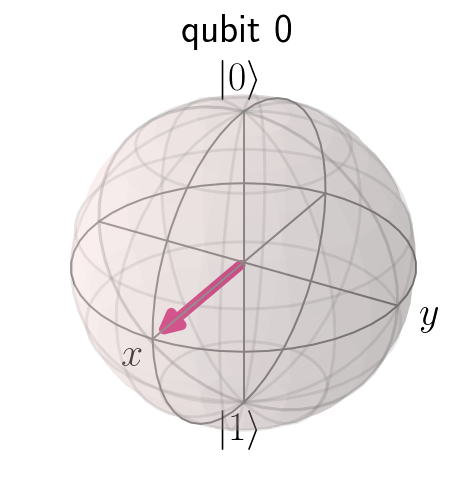

In [116]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

Debería ser obvio a partir de esto que hay un número infinito de puertas posibles, y que esto también incluye las puertas R<sub>x</sub> y R<sub>y</sub>, aunque no se mencionan aquí. También se debe tener en cuenta que no hay nada especial en la base Z, excepto que se ha seleccionado como la base de cálculo estándar. Qiskit también proporciona el equivalente X de S y Sdg-gate, es decir, SX-gate y SXdg-gate respectivamente. Estas puertas dan un cuarto de vuelta con respecto al eje X alrededor de la esfera de Bloch y son un caso especial de la puerta R<sub>x</sub>.


Antes de ejecutarse en hardware cuántico real de IBM, todas las operaciones de un solo qubit se compilan en $I$, $X$, $SX$ y $R_{z}$. Por esta razón, a veces se les llama las _puertas físicas_.

##Argumentos a favor de la computación cuántica

###La complejidad de agregar <a id="agregar"></a>

El caso de las computadoras cuánticas, en pocas palabras, es que pueden resolver ciertos problemas que ninguna computadora clásica pudo. Para entender por qué sucede esto, primero debemos considerar cuánto esfuerzo computacional se requiere para resolver ciertos problemas.

Para comenzar, podemos revisar el algoritmo considerado en la primera sección: sumar dos números.

```
    9213
+ 1854
= ????
```

La suma de dos números de $n$ dígitos se puede hacer con un conjunto de operaciones simples, cada una de las cuales consiste en simplemente sumar dos números de un solo dígito. Para analizar la complejidad del procedimiento, podemos pensar en cuántas de estas sumas básicas se requieren y cómo este número depende de $n$. Nos referiremos a este número como $c(n)$.

En el caso más sencillo, donde no necesitamos llevar un 1 en ningún momento, solo se requieren $n$ sumas básicas. En el peor de los casos, necesitaremos realizar $n$ operaciones de acarreo, cada una de las cuales requerirá una adición básica adicional. De estas consideraciones, podemos concluir que $n \leq c(n) \leq 2n$.

###Big O Notation <a id="big-o"></a>

We can summarize this result by saying that $c(n)$ grows linearly with $n$. More generally, we can say that a linear function of $n$ can be found which acts as an upper bound for $c(n)$ when $n$ is large. Since this is a long and wordy sentence, we won't actually want to say this very often. Instead, we can express it more compactly using 'big O notation'.

<p>
 <details>
  <summary>Definition: Big O notation (Click to expand)</summary>
For some example functions $f(x)$ and $g(x)$ and parameter $x$, the statement $f(x) = O(g(x))$  means that there exist some finite numbers $M>0$ and $x_0$ such that
$$
f(x) \leq M g(x) \forall x>x_0.
$$ 
 </details>
</p>

Big O notation is useful as it allows us to compare how the resources/runtime required by an algorithm scale with input size, independent of the specific platform and algorithm implementation under consideration. Below are examples of common scaling factors of a runtime $N$ as a function of input size $n$; it is clear that for a sufficiently large problem size the runtime of a $O(a^n)$ algorithm will exceed that of a $O(n^b)$ algorithm, where $a$ and $b$ are constants.



With this notation, the property described above is expressed simply as $c(n) = O(n)$. This captures the linear behavior without needing to dwell on the specifics. Therefore, independent of whether $c(n) = n$, $c(n) = 2n$, or something else, we can simply say that $c(n) = O(n)$.

There is a hidden assumption in what we have considered so far. By talking about the number of digits, we have assumed the use of a specific number system. However, the number of digits will depend on which number system we are using, be it decimal, binary, or something else. For example, the number of bits $n_2$ required to express a number is related to the number of decimal digits $n_{10}$ required to express the same number by

$n_2 = \left\lceil \frac{\log 10}{ \log 2} \, n_{10} \right\rceil \approx 3.3 \, n_{10}.$

Since this too is a linear relationship, it does not change how we express the complexity using big O notation. We can equally say that $c(n_2) = O(n_2)$, $c(n_{10}) = O(n_{10})$, or even $c(n_{10}) = O(n_{2})$. It is for this reason that we can often simply speak of the number of digits, $n$, without needing to specify what number system is used.

###Teoría de la complejidad algorítmica

Complexity theory is the study of the computational effort required to run any algorithm. By considering the best possible algorithm to solve a given problem, we can also study the computational effort inherent in solving this problem. For addition we already know the optimal algorithm, and so know that it is a problem with $O(n)$ complexity.

Multiplication is not quite so simple. Algorithms you learned at school for multiplying two $n$-digit numbers will have required $O(n^2)$ basic operations, such as single-digit additions and multiplications. Though algorithms with lower asymptotic complexity have been found, it is widely regarded as impossible to perform multiplication with $O(n)$ complexity.

Even so, multiplication is far from being the most complex problem. An example of a problem with far greater complexity is factorization: taking an $n$-digit number and finding its prime factors. The best known algorithm in this case has a complexity that is worse than $O\left(e^{n^{1/3}}\right)$. The exponential here means that the complexity grows very quickly and makes factorization a very hard problem to solve.

To demonstrate this point using actual computation time, we can take a recent example.$^{1}$ Consider the following 829-digit number.

In [117]:
rsa_250 = 2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937

If you try using your computer to add or multiply numbers of this size, you'll find that it can solve such problems very quickly. If you multiply the number of processors your computer has with the number of seconds it takes to get the number of core-seconds, you are sure to find that very much less than 1 core-second is required.

However, performing factorization on this number requires a supercomputer and around 2700 core-years, which eventually yields the following two factors.

In [118]:
p = 64135289477071580278790190170577389084825014742943447208116859632024532344630238623598752668347708737661925585694639798853367
q = 33372027594978156556226010605355114227940760344767554666784520987023841729210037080257448673296881877565718986258036932062711
p*q

2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937

Para la factorización de números más grandes, llegamos fácilmente a un punto en el que una supercomputadora del tamaño de un planeta necesitaría funcionar para la edad del universo. Claramente, cualquier problema de este tipo es prácticamente imposible.

Hasta ahora hemos considerado solo operaciones matemáticas en números de $n$ dígitos, con la complejidad expresada como el número de operaciones simples de un solo dígito requeridas. Sin embargo, la teoría de la complejidad se puede utilizar para analizar cualquier método computacional para cualquier tipo de problema, ya sea buscando bases de datos, renderizando gráficos, simulando dinámicas o atravesando una mazmorra en *Legend of Zelda*. En cada caso, podemos encontrar un parámetro o conjunto de parámetros que sirvan como nuestro tamaño de entrada y expresar la complejidad en términos de este tamaño de entrada utilizando la notación O grande. Para buscar en una base de datos de $N$ entradas, por ejemplo, la complejidad es $O(N)$.

Formalmente, definir la complejidad de un algoritmo depende del modelo teórico exacto para el cálculo que estemos usando. Cada modelo tiene un conjunto de operaciones básicas, conocidas como operaciones primitivas, con las que se puede expresar cualquier algoritmo. Para los circuitos booleanos, como consideramos en la primera sección, las operaciones primitivas son las puertas lógicas. Para las máquinas de Turing, una forma hipotética de computadora propuesta por Alan Turing, imaginamos un dispositivo que avanza y manipula la información almacenada en una cinta. El modelo RAM tiene un conjunto más complejo de operaciones primitivas y actúa como una forma idealizada de las computadoras que usamos todos los días. Todos estos son modelos de computación digital, basados ​​en manipulaciones discretizadas de valores discretos. Por diferentes que parezcan entre sí, resulta que es muy fácil para cada uno de ellos simular a los demás. Esto significa que en la mayoría de los casos la complejidad computacional no depende significativamente de cuál de estos modelos se utilice. En lugar de establecer la complejidad específicamente para el modelo RAM o las máquinas de Turing, podemos simplemente hablar de la complejidad de las computadoras digitales.

###El limite de la compputación digital

Aunque las computadoras digitales son dominantes ahora, no son la única forma de computación. Las computadoras analógicas también fueron ampliamente estudiadas y utilizadas en el pasado. A diferencia de los valores discretos de las computadoras digitales, estos se basan en manipulaciones precisas de parámetros que varían continuamente. A veces se ha afirmado que tales dispositivos podrían resolver rápidamente problemas que son intratables para las computadoras digitales. Sin embargo, tales afirmaciones nunca se han realizado. Un obstáculo importante para las computadoras analógicas es la incapacidad de construir dispositivos con una precisión arbitrariamente alta. En las computadoras digitales, la discretización significa que los errores deben ser relativamente grandes para que se noten, y luego se pueden implementar métodos para detectar y corregir dichos errores. En las computadoras analógicas, sin embargo, los errores pueden ser arbitrariamente pequeños e imposibles de detectar, pero aún así sus efectos pueden acumularse para arruinar un cálculo.

Si uno tuviera que proponer un modelo ideal de computación, podría tratar de combinar la robustez de una computadora digital con las manipulaciones sutiles de una computadora analógica. Para lograr esto podemos mirar a la mecánica cuántica. Ya hemos visto que los qubits son un sistema con salidas discretas `0` y `1` y, sin embargo, pueden existir en estados que solo pueden describirse mediante parámetros continuos. Este es un caso particular de la bien conocida noción de dualidad 'onda-partícula' que es típica de los sistemas cuánticos. No pueden describirse completamente como discretos o continuos, sino como una combinación de los dos. Como dijo Einstein, $^{2}$

> 'Parece como si a veces debiéramos usar una teoría ya veces la otra, mientras que a veces podemos usar cualquiera de las dos. Nos enfrentamos a un nuevo tipo de dificultad. Tenemos dos imágenes contradictorias de la realidad; por separado ninguno de ellos explica completamente los fenómenos... pero juntos lo hacen.'

Una computadora cuántica, cuyas operaciones primitivas son puertas aplicadas a qubits, no es, por lo tanto, ni analógica ni digital, sino algo único. En capítulos posteriores exploraremos las consecuencias de esta naturaleza única. Veremos que las computadoras cuánticas pueden resolver problemas con una complejidad radicalmente diferente a las computadoras digitales. De hecho, la computación cuántica es la única tecnología conocida que puede ser exponencialmente más rápida que las computadoras clásicas para ciertas tareas, reduciendo potencialmente los tiempos de cálculo de años a minutos. También exploraremos cómo la corrección de errores cuánticos puede eliminar los efectos de cualquier imperfección.

###Cuando es ventajoso utilizar un procesador cuántico?

Con qubits y puertas cuánticas, podemos diseñar algoritmos novedosos que son fundamentalmente diferentes de los clásicos digitales y analógicos. De esta manera, esperamos encontrar soluciones a problemas que son intratables para las computadoras clásicas.

Una forma en que esto se puede hacer es cuando tenemos alguna función para la que queremos determinar una propiedad global. Por ejemplo, si queremos encontrar el valor de algún parámetro $x$ para el cual alguna función $f(x)$ es un mínimo, o el periodo de la función si $f(x)$ es periódica. Un algoritmo en una computadora digital podría usar un proceso en el que se calcula $f(x)$ para una variedad de entradas diferentes a fin de obtener suficiente información sobre la propiedad global. Sin embargo, con una computadora cuántica, el hecho de que podamos crear estados de superposición significa que la función se puede aplicar a muchas entradas posibles simultáneamente. Esto no significa que podamos acceder a todas las salidas posibles ya que la medición de tal estado simplemente nos da un único resultado. Sin embargo, podemos intentar inducir un efecto de interferencia cuántica, que revelará la propiedad global que necesitamos.

Esta descripción general ilustra el funcionamiento de muchos de los algoritmos cuánticos que ya se han descubierto. Un ejemplo destacado es el algoritmo de Grover, que reduce la complejidad de buscar a través de $N$ elementos de $O(N)$ a $O(N^{1/2})$. Esta aceleración cuadrática podría ser útil en muchas aplicaciones con tareas que se pueden expresar como una búsqueda no estructurada, como problemas de optimización y aprendizaje automático.

In [119]:
# This code is to create the interactive figure
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import figure, show
from bokeh.embed import file_html
from bokeh.resources import CDN
import numpy as np
import IPython

x = np.arange(0,500)
y_linear = x
y_sqrt = 7.5*np.sqrt(x)

linear_source = ColumnDataSource(data=dict(x=x, y=y_linear))
sqrt_source = ColumnDataSource(data=dict(x=x, y=y_sqrt))

plot = figure(
              plot_height=400, 
              plot_width=800,
              sizing_mode="scale_width",
              tools="reset,save",
              x_range=[0, 500], y_range=[0, 500], 
              x_axis_label="Size of Problem",
              y_axis_label="Time Taken to Find Solution")
plot.line('x', 'y', source=linear_source, line_width=3, line_alpha=0.6, color="blue", legend_label="Classical Search O(N)")
plot.line('x', 'y', source=sqrt_source, line_width=3, line_alpha=0.6, color="red", legend_label="Quantum Search O(√N)")
plot.legend.location = "top_left"

callback = CustomJS(args=dict(source=sqrt_source), code="""
        var data = source.data;
        var f = (10-cb_obj.value)*2 + 3
        var x = data['x']
        var y = data['y']
        for (var i = 0; i < x.length; i++) {
            y[i] = f*Math.sqrt(x[i])
        }
        source.change.emit();
    """)

speed_slider = Slider(title="Relative Speed of Quantum Computer", value=7.5, start=1.0, end=10.0, step=0.1, show_value=False)
speed_slider.js_on_change('value', callback)

layout = column(plot, speed_slider)

caption = """
Es difícil comparar el rendimiento de los algoritmos en diferentes plataformas. Lo que podemos decir (a través de la notación O grande) es
a pesar de la diferencia de velocidades entre nuestras computadoras clásicas y cuánticas, para un problema lo suficientemente grande, la búsqueda cuántica
el algoritmo siempre superará al algoritmo de búsqueda clásico."""

html_repr = file_html(layout, CDN)
html_fig = "<figure>{0}<figcaption>{1}</figcaption></figure>".format(html_repr, caption)
IPython.display.HTML(html_fig)

Se obtiene una aceleración aún más impresionante con el algoritmo de Shor, que analiza funciones periódicas en el corazón del problema de factorización. Esto permite una solución cuántica para factorizar números de $n$ dígitos con complejidad $O(n^3)$. Esta es una aceleración superpolinomial en comparación con la complejidad de las computadoras digitales, que es peor que $O\left(e^{n^{1/3}}\right)$.

Otro enfoque hacia los algoritmos cuánticos es usar computadoras cuánticas para resolver problemas cuánticos. Como veremos en el próximo capítulo, expresar un estado cuántico requiere una cantidad de información que escala exponencialmente con el número de qubits. El solo hecho de escribir el estado de $n$ qubits se convierte en una tarea insuperable para las computadoras digitales a medida que aumenta $n$. Sin embargo, para una computadora cuántica solo necesitamos $n$ qubits para hacer el mismo trabajo. Esta capacidad natural para expresar y manipular estados cuánticos nos permite estudiar y comprender mejor los sistemas cuánticos de interés, como las moléculas y las partículas fundamentales.

Por lo tanto, la aplicación y adaptación de algoritmos cuánticos en diferentes industrias tiene la promesa de permitir casos de uso disruptivos en los negocios y la ciencia. Estos incluyen avances en el descubrimiento de fármacos, el aprendizaje automático, el descubrimiento de materiales, la fijación de precios de opciones, el plegamiento de proteínas y la cadena de suministro.$^{3}$ Particularmente prometedores son aquellos problemas para los que los algoritmos clásicos enfrentan límites de escala inherentes y que no requieren una gran escala clásica. conjunto de datos a cargar. Para obtener una ventaja cuántica, las respuestas de un problema dado deben depender en gran medida de muchos grados de libertad entrelazados exponencialmente con una estructura tal que la mecánica cuántica evolucione hacia una solución sin tener que pasar por todos los caminos. Tenga en cuenta, sin embargo, que la relación precisa entre los problemas que son 'fáciles' para las computadoras cuánticas (que se pueden resolver en tiempo polinomial) y otras clases teóricas de complejidad sigue siendo una pregunta abierta.$^{4}$

Esto es solo una muestra de cómo los algoritmos cuánticos pueden realizar cálculos de una manera única. Se pueden encontrar más detalles sobre estos enfoques en capítulos posteriores. Pero primero debemos mirar más allá del qubit único e invertir algo de tiempo en comprender el conjunto completo de puertas cuánticas que necesitaremos. Este es el enfoque del próximo capítulo.